In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
weather = pd.read_csv("data/weather_data.csv")
sales = pd.read_csv("data/sales_data.csv")

In [10]:
merged = pd.merge(weather, sales, on='date')
merged

,date,avg_temp_c,precip_mm,condition,hot_drinks,cold_drinks,umbrellas
0,2025-05-23,19.5,0.0,Sunny,28,49,8
1,2025-05-22,18.2,0.0,Partly cloudy,34,52,12
2,2025-05-21,18.8,0.0,Partly cloudy,23,45,6
3,2025-05-20,18.1,0.0,Partly cloudy,32,49,7
4,2025-05-19,17.0,0.1,Overcast,36,43,8
5,2025-05-18,17.5,0.7,Patchy rain possible,24,52,10
6,2025-05-17,19.9,0.0,Sunny,27,52,5


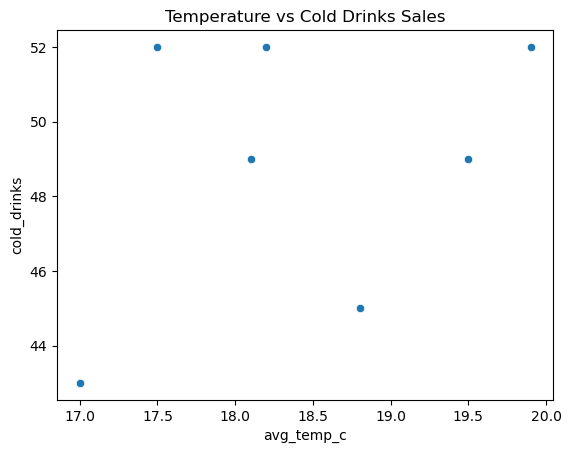

In [11]:
sns.scatterplot(x="avg_temp_c", y="cold_drinks", data = merged)
plt.title("Temperature vs Cold Drinks Sales")
plt.show()

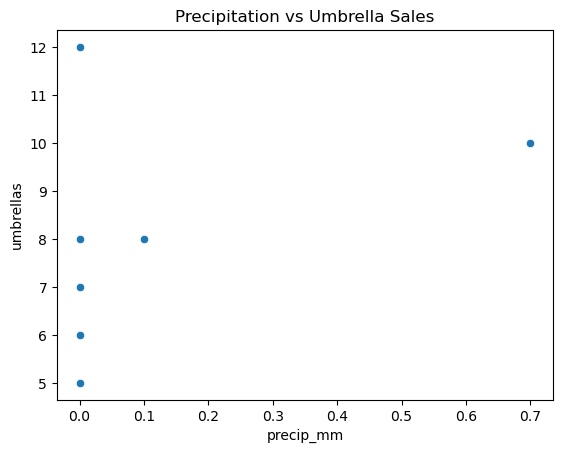

In [12]:
sns.scatterplot(x="precip_mm", y="umbrellas", data=merged)
plt.title("Precipitation vs Umbrella Sales")
plt.show()

In [14]:
co_mtx = merged.corr()

co_mtx

,avg_temp_c,precip_mm,hot_drinks,cold_drinks,umbrellas
avg_temp_c,1.000000,-0.485990,-0.440867,0.354229,-0.510670
precip_mm,-0.485990,1.000000,-0.373692,0.284398,0.375625
hot_drinks,-0.440867,-0.373692,1.000000,-0.220198,0.351411
cold_drinks,0.354229,0.284398,-0.220198,1.000000,0.328314
umbrellas,-0.510670,0.375625,0.351411,0.328314,1.000000


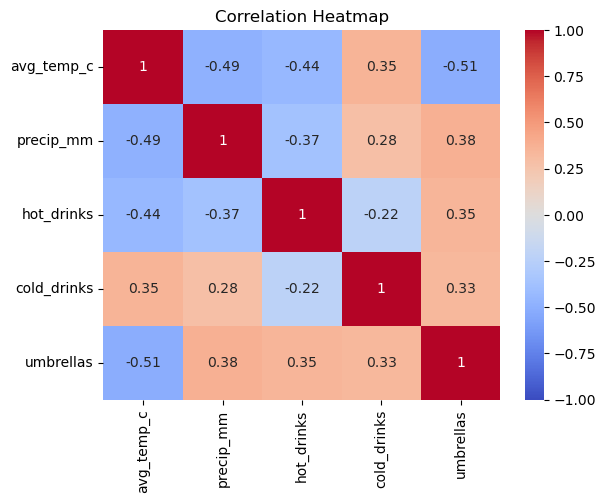

In [ ]:
sns.heatmap(co_mtx, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


-3.4139712157996485
4.201890629609318


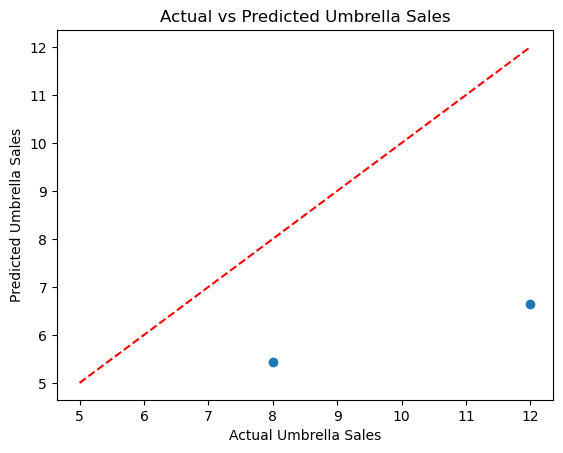

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

x = merged[['precip_mm', 'avg_temp_c']]
y = merged['umbrellas']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(r2_score(y_test, y_pred))
print(root_mean_squared_error(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Umbrella Sales")
plt.ylabel("Predicted Umbrella Sales")
plt.title("Actual vs Predicted Umbrella Sales")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # diagonal line
plt.show()
